In [28]:
##########################################################################################
# Author: Arun John 20-Sep-2017                                                          #
##########################################################################################

import matplotlib.pyplot as plt # this is to plot the change in cost with every iteration
import numpy as np #this is to implement our model using vectorization instead of for loops

##########################################################################################
# Note: A exclusive for loop will be used for the number of iterations                   #
#       that the model will be trained for. The more number of                           #
#       iterations there are,,more is the accuracy of the estimated                      #
#       parameters but also the training time will be higher.                            #
##########################################################################################

In [29]:
train_set = np.genfromtxt('datatraining.csv',delimiter=',') # Get the training data from the datatraining.csv file
test_set = np.genfromtxt('datatest.csv',delimiter=',') #Get the training data from the datatest.csv file

##########################################################################################
# Note: The file containing the training data and the test data have                     #
#       already been modified to show the relevant columns without                       #
#       the top which contained the feature name.                                        #
#       To see how the files looked originally,please refer to the                       #
#       folder named Originals for the original files.                                   #
##########################################################################################

print(test_set.shape) #to see the dimensions of the test set
print(train_set.shape) #to see the dimensions of the training set

(2665, 6)
(8143, 6)


In [30]:
train_labels = train_set[:,5] #this is done to extract the expected labels from the training set
test_labels = test_set[:,5] #extracting labels from the test set

print(train_labels.shape) #show the dimensions of Y_training i.e. expected labels
print(test_labels.shape) #show the dimensions of Y_test i.e. expected labels

(8143,)
(2665,)


In [31]:
train_set= train_set[:,[0,1,2,3,4]] #extracting only the features from the training set
test_set= test_set[:,[0,1,2,3,4]] #extracting only the features from the test set

print(train_set.shape) #show the dimensions of the training set
print(test_set.shape) #show the dimensions of the test set

(8143, 5)
(2665, 5)


In [32]:
train_set=train_set.T #for carrying out W.X + b to make the dimensions match,we take the transpose
test_set=test_set.T #for the same reason as the training set,we take the tranpose
train_labels=train_labels.T #as stated above
test_labels=test_labels.T #as stated above
train_set= train_set/255 #this is to normalize the data,here an arbitrary value is taken. THIS HAS NOTHING TO DO
test_set= test_set/255 # WITH THE NORMALIZATION USED FOR IMAGES,

np.random.seed(1) #this is setting the seed for the random function

def sigmoid(z): #this is a helper function which will find out the sigmoid of a given input
    A= 1/(1+(np.exp(-z))) #note np.exp is used because z will not necessarily be a single number
    return A 
def initialize(dim): #this function is used to initialize the parameters W and b
    W = np.random.randn(1,dim)*0.001 #this gives a matrix of lxl-1 but in this case since l=1,we get 1xl-1
    b = 0 #since python does broadcasting,this can be done and W.X + b will be treated as a valid operation
    return W,b

In [33]:
def model(X,Y,iterations=50000,learning_rate=0.05): #function to train the model given,training data,training labels
    m=X.shape[1] #number of samples
    W,b = initialize(X.shape[0]) #initialize the parameters
    costs=[] #this is for plotting the costs after every iteration
    for i in range(iterations): #to train the model for a given number of iterations
        Z=np.dot(W,X)+b #performing W.X + b ,make sure your dimensions match up!
        A = sigmoid(Z) #activation function
        cost = -1*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m #calculating the cost
        dw = np.dot((A-Y),X.T)/m #calculating dw,needed to update the parameters
        db = np.sum(A-Y)/m #calculating db
        W = W - learning_rate*dw #updating W
        b = b - learning_rate*db #updating b
        costs.append(cost) #append the current cosr to the costs list
    plt.plot(costs) #plot the costs
    plt.show() #show the plot
    return costs,W,b

In [34]:
def predict(X,W,b,Y): #predict the labels,given the parameters,data and labels
    m=X.shape[1] #number of samples
    Y_prediction = np.zeros((1,m)) #initialize the predictions to all zeros
    A = sigmoid(np.dot(W,X)+b) #get the predictions
    for i in range(A.shape[1]):
        Y_prediction[0][i]= int(A[0][i]/0.5) #bring it to either 0 or 1
    return (100 - np.mean(np.abs(Y_prediction - Y)) * 100)

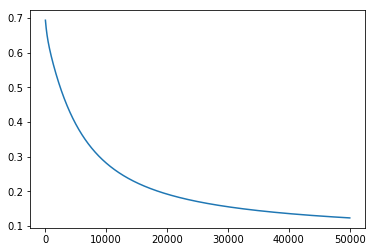

In [38]:
costs,W,b = model(train_set,train_labels,50000,0.001)

In [39]:
print("test set: ",predict(test_set,W,b,test_labels))

test set:  97.8986866792


In [40]:
print("training set: ",predict(train_set,W,b,train_labels))

training set:  97.0895247452


In [41]:
test2_set = np.genfromtxt('datatest2.csv',delimiter=',')
test2_labels = test2_set[:,5]
test2_set= test2_set[:,[0,1,2,3,4]]
test2_labels=test2_labels.T
test2_set=test2_set.T
test2_set=test2_set/255

In [43]:
print("test 2 set: ",predict(test2_set,W,b,test2_labels))

test 2 set:  98.5028712059
